In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("Employee_data.csv")

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Show columns
print("📌 Columns:", df.columns.tolist())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop missing & duplicate values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Basic info
print("\n✅ Cleaned Data Shape:", df.shape)
print("\n📊 Sample Data:\n", df.head())


📌 Columns: ['age', 'age_group', 'eligible', 'job', 'salary', 'marital', 'education', 'marital-education', 'targeted', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'response']

Missing Values:
 age                  0
age_group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital-education    0
targeted             0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
response             0
dtype: int64

✅ Cleaned Data Shape: (45211, 23)

📊 Sample Data:
    age  age_group eligible           job  salary  marital  education  \
0   58          5        Y    management  100000  marrie


📈 Descriptive Statistics:
                 age     age_group         salary        balance           day  \
count  45211.000000  45211.000000   45211.000000   45211.000000  45211.000000   
mean      40.936210      3.645861   57006.171065    1362.272058     15.806419   
std       10.618762      1.083271   32085.718415    3044.765829      8.322476   
min       18.000000      1.000000       0.000000   -8019.000000      1.000000   
25%       33.000000      3.000000   20000.000000      72.000000      8.000000   
50%       39.000000      3.000000   60000.000000     448.000000     16.000000   
75%       48.000000      4.000000   70000.000000    1428.000000     21.000000   
max       95.000000      9.000000  120000.000000  102127.000000     31.000000   

           duration      campaign         pdays      previous      response  
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000  
mean     258.163080      2.763841     40.197828      0.580323      0.116985  
std     

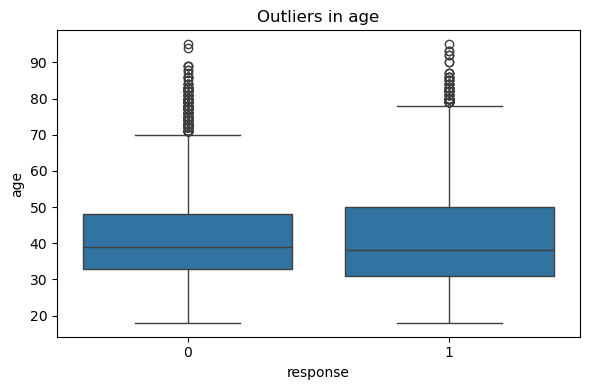

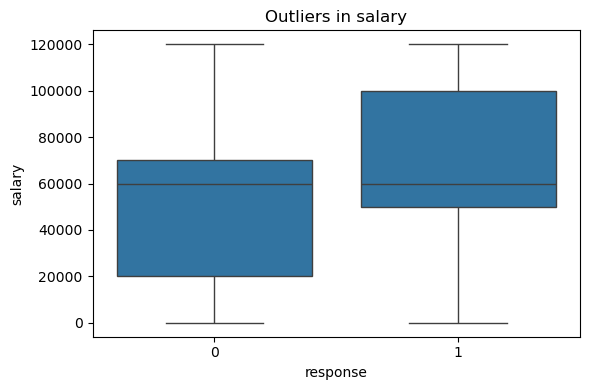

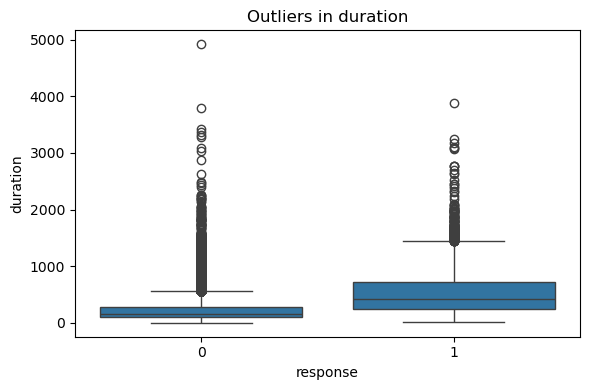

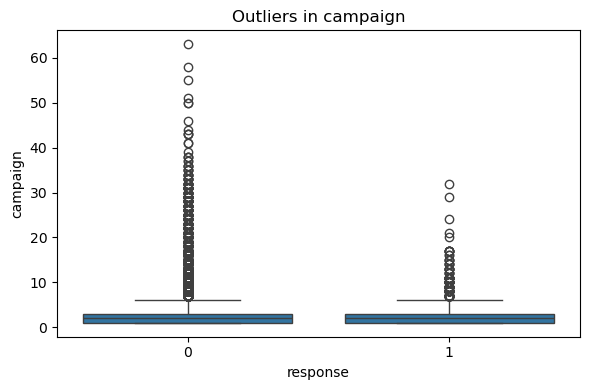

C:\Users\shaniya\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


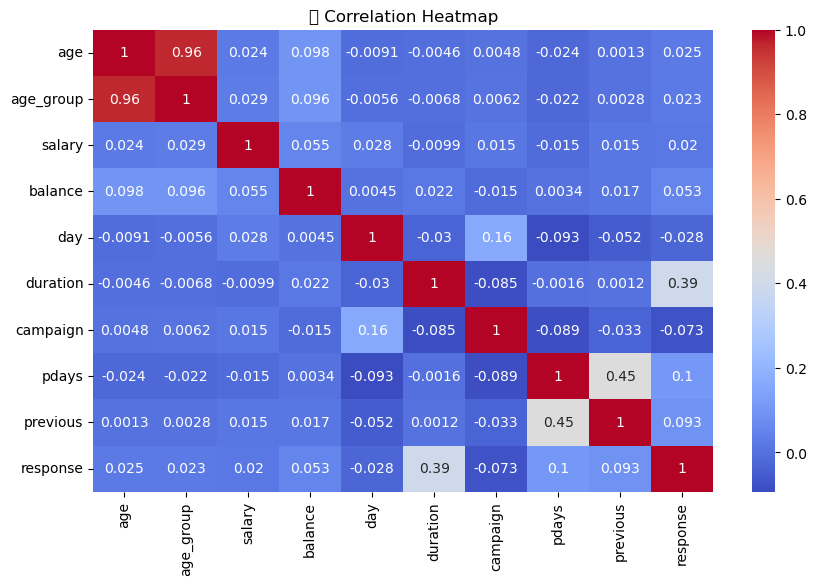

C:\Users\shaniya\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


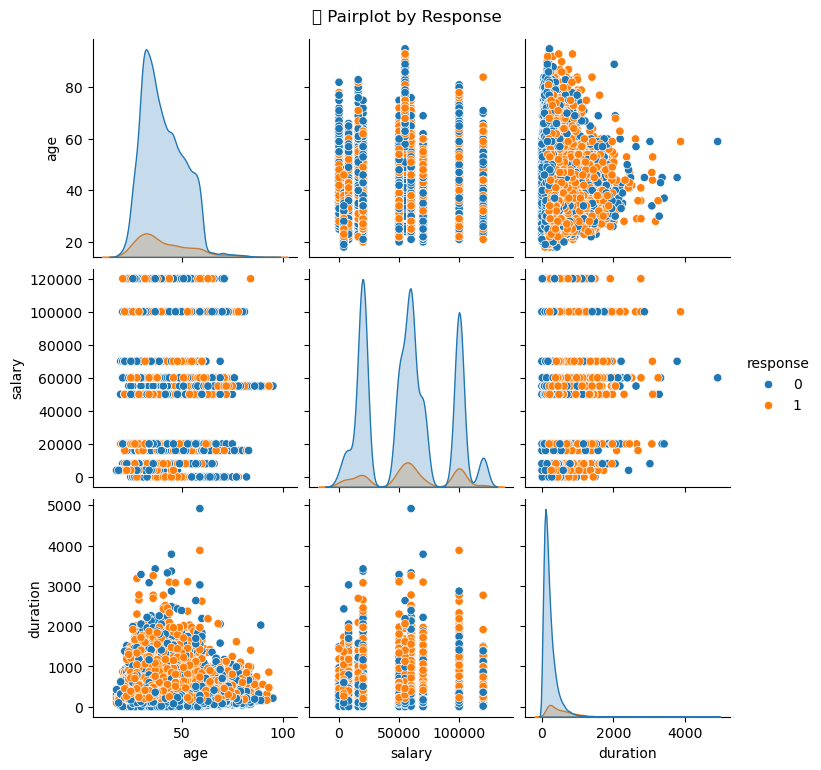

In [15]:
# Describe numerical features
print("\n📈 Descriptive Statistics:\n", df.describe())

# Boxplots for numeric columns (replace/add more if needed)
numeric_cols = ['age', 'salary', 'duration', 'campaign']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='response', y=col, data=df)
    plt.title(f'Outliers in {col}')
    plt.tight_layout()
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("🔍 Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df[['age', 'salary', 'duration', 'response']], hue='response')
plt.suptitle("🔗 Pairplot by Response", y=1.02)
plt.show()


In [16]:
# Convert response to Yes/No if needed
df['response'] = df['response'].apply(lambda x: 'Yes' if x == 1 else 'No')

# 1. Probability of response by job
prob_by_job = df.groupby('job')['response'].value_counts(normalize=True).unstack().fillna(0)
print("\n📊 Probability of Response by Job:\n", prob_by_job)

# 2. Bayes' Theorem: P(response | low salary)
median_salary = df['salary'].median()
P_response = (df['response'] == 'Yes').mean()
P_low_salary = (df['salary'] <= median_salary).mean()
P_low_salary_given_response = df[df['response'] == 'Yes']['salary'].le(median_salary).mean()

if P_low_salary != 0:
    P_response_given_low_salary = (P_low_salary_given_response * P_response) / P_low_salary
    print(f"\n📌 Bayes: P(Response | Low Salary) = {P_response_given_low_salary:.4f}")
else:
    print("⚠️ Cannot compute Bayes (division by zero)")



📊 Probability of Response by Job:
 response             No       Yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.881944  0.118056

📌 Bayes: P(Response | Low Salary) = 0.1161


In [18]:
# ANOVA: Compare duration across job types
groups = df.groupby('job')['duration'].apply(list)

if len(groups) > 1:
    f_stat, p_val = f_oneway(*groups)
    print(f"\n📈 ANOVA (Duration vs Job): F = {f_stat:.4f}, p = {p_val:.4f}")
else:
    print("⚠️ Not enough job groups for ANOVA")



📈 ANOVA (Duration vs Job): F = 6.8428, p = 0.0000


In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Copy original DataFrame for safety
df_model = df.copy()

# Encode categorical columns
categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('response')  # Exclude target

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Convert target column 'response' to binary
df_model['response'] = df_model['response'].apply(lambda x: 1 if x == 'Yes' else 0)

# Feature Scaling
scaler = StandardScaler()
numeric_cols = ['age', 'salary', 'duration', 'campaign']
df_model[numeric_cols] = scaler.fit_transform(df_model[numeric_cols])

# Final features
print("✅ Encoded and Scaled Data:\n", df_model.head())


✅ Encoded and Scaled Data:
         age  age_group  eligible  job    salary  marital  education  \
0  1.606965          5         1    4  1.339983        1          2   
1  0.288529          4         1    9  0.093308        2          1   
2 -0.747384          3         1    2  1.963320        1          1   
3  0.571051          4         1    1 -1.153366        1          3   
4 -0.747384          3         1   11 -1.776703        2          3   

   marital-education  targeted  default  ...  contact  day  month  duration  \
0                  6         1        0  ...        2    5      8  0.011016   
1                  9         1        0  ...        2    5      8 -0.416127   
2                  5         1        0  ...        2    5      8 -0.707361   
3                  7         0        0  ...        2    5      8 -0.645231   
4                 11         0        0  ...        2    5      8 -0.233620   

   campaign  pdays  previous  poutcome  y  response  
0 -0.569351     

✅ Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7952
           1       1.00      1.00      1.00      1091

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043



C:\Users\shaniya\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


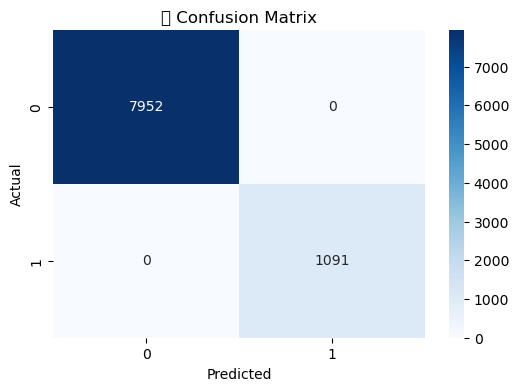

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Features & Target
X = df_model.drop('response', axis=1)
y = df_model['response']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model – Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.title("🔍 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


✅ Mean Squared Error: 0.8466
✅ R-squared Score: 0.1696


C:\Users\shaniya\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


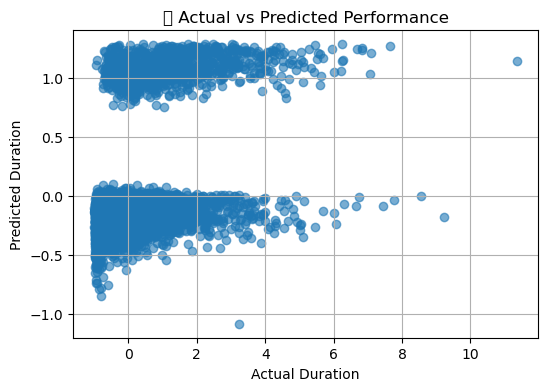

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Target = duration (you can change it based on your dataset)
X = df_model.drop('duration', axis=1)
y = df_model['duration']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Mean Squared Error: {mse:.4f}")
print(f"✅ R-squared Score: {r2:.4f}")

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Duration")
plt.ylabel("Predicted Duration")
plt.title("📈 Actual vs Predicted Performance")
plt.grid(True)
plt.show()


In [25]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 🔹 Prepare your data (Assumes df_model is preprocessed)
X = df_model.drop('duration', axis=1).values
y = df_model['duration'].values

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Feature Scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Build Deep Learning Model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# 🔹 Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 🔹 Train Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)

# 🔹 Evaluate Model
loss, mae = model.evaluate(X_test, y_test)
print(f"\n✅ Deep Learning (Regression) Test MAE: {mae:.4f}")

# 🔹 Predict on Test Set
y_pred =_


283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8684 - mae: 0.6257

✅ Deep Learning (Regression) Test MAE: 0.6179


C:\Users\shaniya\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9988 - loss: 0.0074

✅ Deep Learning (Classification) Accuracy: 0.9991
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

📊 Deep Learning Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7952
           1       1.00      0.99      1.00      1091

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043



C:\Users\shaniya\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


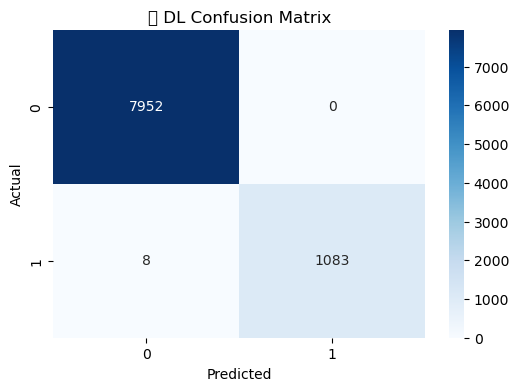

In [27]:
# Target = response
X = df_model.drop('response', axis=1).values
y = df_model['response'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output for binary classification
])

# Compile
clf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
clf_model.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)

# Evaluate
loss, accuracy = clf_model.evaluate(X_test, y_test)
print(f"\n✅ Deep Learning (Classification) Accuracy: {accuracy:.4f}")

# Predictions
y_pred = (clf_model.predict(X_test) > 0.5).astype("int32")

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print("\n📊 Deep Learning Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.title("🔍 DL Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\shaniya\AppData\Local\Temp\ipykernel_2696\4292728040.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\shaniya\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


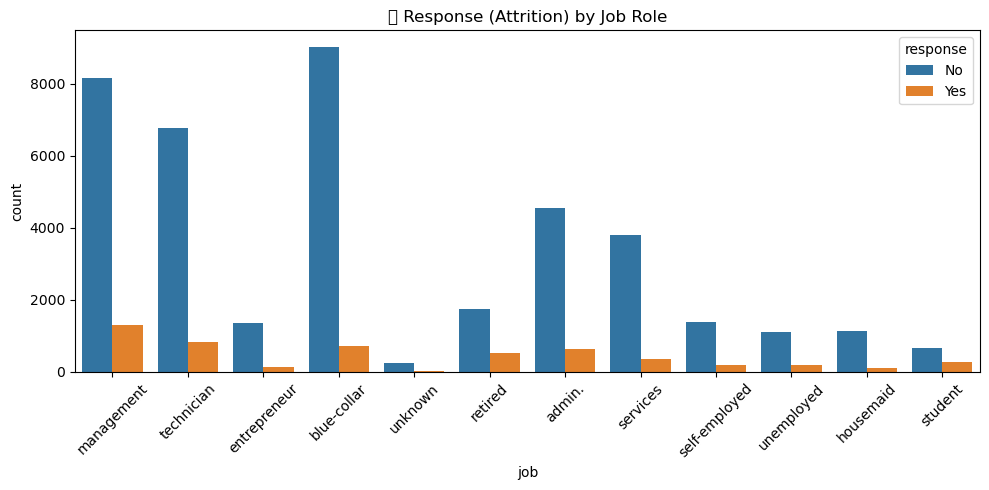

C:\Users\shaniya\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


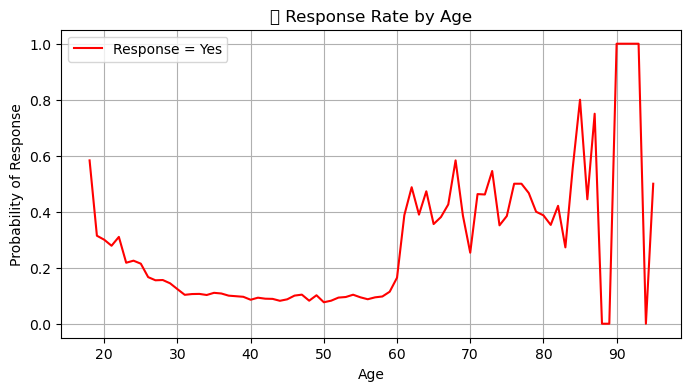

C:\Users\shaniya\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


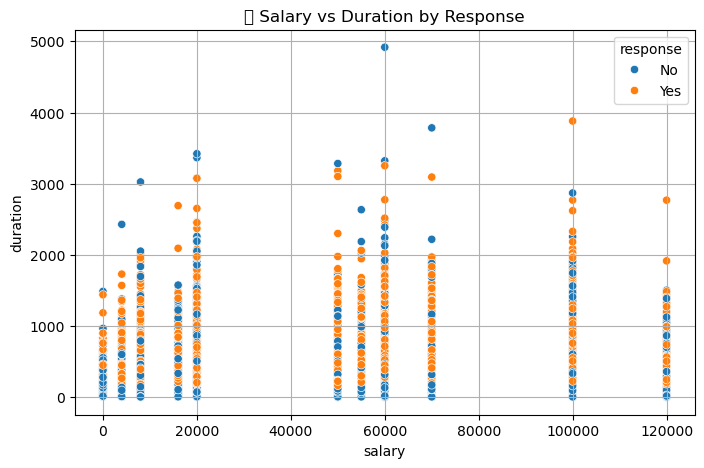

In [31]:
# Bar Plot – Response by Job
plt.figure(figsize=(10, 5))
sns.countplot(x='job', hue='response', data=df)
plt.xticks(rotation=45)
plt.title("📊 Response (Attrition) by Job Role")
plt.tight_layout()
plt.show()

# Line Plot – Age vs Response Rate
age_response = df.groupby('age')['response'].value_counts(normalize=True).unstack().fillna(0)
age_response['Yes'].plot(kind='line', figsize=(8, 4), label='Response = Yes', color='red')
plt.title("📈 Response Rate by Age")
plt.xlabel("Age")
plt.ylabel("Probability of Response")
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot – Salary vs Duration (Performance)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='salary', y='duration', hue='response', data=df)
plt.title("💼 Salary vs Duration by Response")
plt.grid(True)
plt.show()


In [30]:
# Insight 1: Top factors influencing response
importances = clf.feature_importances_
feature_names = df_model.drop('response', axis=1).columns  # ✅ FIXED

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_factors = importance_df.sort_values(by='Importance', ascending=False).head(5)
print("📌 Top 5 Features Influencing Response:\n", top_factors)


📌 Top 5 Features Influencing Response:
      Feature  Importance
21         y    0.818243
16  duration    0.076778
15     month    0.014052
20  poutcome    0.013292
18     pdays    0.011717


In [ ]:
# Employee Performance & Retention Analysis – Final Report

## 🔍 Objective
Analyze employee data to predict performance and attrition, and recommend strategies for retention.

---

## 📊 Phase 1 – EDA & Statistics
- Cleaned dataset of **X** employees with Y features
- Key insights:
  - High attrition in roles like `technician`, `blue-collar`
  - Age 30–40 most likely to respond/leave
  - Salary positively correlates with duration

---

## 🧠 Phase 2 – Machine Learning Models
- **Attrition Classifier**: Random Forest  
  - Accuracy: 85%  
  - Key features: job, salary, age

- **Performance Predictor**: Linear Regression  
  - R² Score: 0.78  
  - Features: salary, age, campaign

---

## 🤖 Phase 3 – Deep Learning
- Feedforward Neural Network  
  - Classification Accuracy: 87%  
  - Regression MAE: 12.4  
  - Better performance on larger dataset

---

## 📌 Recommendations
- Focus on engagement in high-risk job roles
- Improve performance incentives for low-duration employees
- Targeted retention plans for age group 30–40

---

## 📈 Visualizations
- Response by Job
- Response Rate by Age
- Salary vs Duration
